Starting off with a call to the US Census API (https://api.census.gov/data/), and collecting data from the 2020 'Current Population Survey Annual Social and Economic Supplement' that matches the state criteria. The state filtering is not done by name ('Texas'), and istead relies on FIPS, which can be accessed through https://www.census.gov/library/reference/code-lists/ansi.html#par_statelist 

In [51]:
%matplotlib inline
import pandas, requests
cols='AGI,A_SEX'
state='48'
base_url = f'https://api.census.gov/data/2020/cps/asec/mar'
data_url = f'{base_url}?get={cols}&in=state:{state}'
response = requests.get(data_url)
print(response.json())

[['AGI', 'A_SEX'], ['124644', '2'], ['0', '1'], ['40289', '1'], ['0', '2'], ['40002', '2'], ['0', '2'], ['8424', '1'], ['58011', '2'], ['0', '1'], ['0', '1'], ['0', '2'], ['0', '1'], ['0', '1'], ['0', '2'], ['115010', '2'], ['0', '1'], ['0', '1'], ['0', '2'], ['0', '1'], ['0', '2'], ['0', '2'], ['0', '2'], ['15000', '1'], ['2451', '1'], ['0', '2'], ['22000', '2'], ['0', '1'], ['0', '2'], ['6250', '1'], ['0', '2'], ['28000', '2'], ['0', '1'], ['0', '2'], ['25000', '1'], ['0', '1'], ['22000', '2'], ['0', '2'], ['0', '1'], ['0', '2'], ['0', '2'], ['0', '2'], ['40872', '1'], ['12000', '2'], ['150000', '1'], ['0', '2'], ['0', '1'], ['70002', '2'], ['0', '1'], ['0', '2'], ['0', '1'], ['41003', '2'], ['153013', '2'], ['0', '1'], ['4201', '2'], ['71262', '2'], ['0', '1'], ['20501', '1'], ['10450', '2'], ['10452', '1'], ['0', '2'], ['96281', '2'], ['0', '1'], ['0', '2'], ['0', '2'], ['0', '1'], ['9000', '2'], ['7000', '1'], ['0', '2'], ['0', '1'], ['0', '1'], ['0', '1'], ['129340', '2'], ['0', 

The columns of data retrieved using the Census API include Federal Adjusted gross income and sex, which are then encoded into the response. Using that response, a new data frame is created, and is then cleaned up by eliminating empty cells.

In [52]:
data = response.json()
data_frame = pandas.DataFrame(data[1:], columns = data[0]).\
    rename(columns = {"AGI": "Federal adjusted gross income", "A_SEX": "Gender"})
data_frame.to_csv("raw_data.csv")
new_df = data_frame.dropna() 
new_df=new_df.astype(dtype={'Federal adjusted gross income':'int64','Gender':'int64'})
new_df

,Federal adjusted gross income,Gender
0,124644,2
1,0,1
2,40289,1
3,0,2
4,40002,2
...,...,...
157954,87633,2
157955,3187,2
157956,0,2
157957,121101,2


In [53]:
new_df.to_csv("clean_agi_data.csv")

The average federal adjusted gross income for all rows is averaged using the column mean.

In [19]:
avg_agi = new_df['Federal adjusted gross income'].mean()
print(avg_agi)

35215.964636392986


The data frame is then divided into male and female data frames, based on the sex variable from the response. According to https://api.census.gov/data/2020/cps/asec/mar/variables/A_SEX.json, the 1 represents males while 2 represents females. Averages are the calculated in the same way that avg_agi was, using column means.

In [10]:
df_female, df_male = [x for _, x in new_df.groupby(new_df['Gender'] < 2)]
df_male

,Federal adjusted gross income,Gender
1,0,1
2,40289,1
6,8424,1
8,0,1
9,0,1
...,...,...
157946,155101,1
157948,109270,1
157951,0,1
157953,9011,1


In [16]:
avg_agi_male = df_male['Federal adjusted gross income'].mean()
print(avg_agi_male)

41290.08093455028


In [17]:
avg_agi_female = df_female['Federal adjusted gross income'].mean()
print(avg_agi_female)

29451.45626503794


New dataframe is created with the previously calculated average adjusted gross incomes, which is then used to visually represent the comparisons.

In [44]:
avgs_df = pandas.DataFrame({'Gender':['Male', 'Female', 'Total'], 'Average Incomes':[avg_agi_male, avg_agi_female, avg_agi]})
avgs_df

,Gender,Average Incomes
0,Male,41290.080935
1,Female,29451.456265
2,Total,35215.964636


Text(0.5, 0, 'Gender')

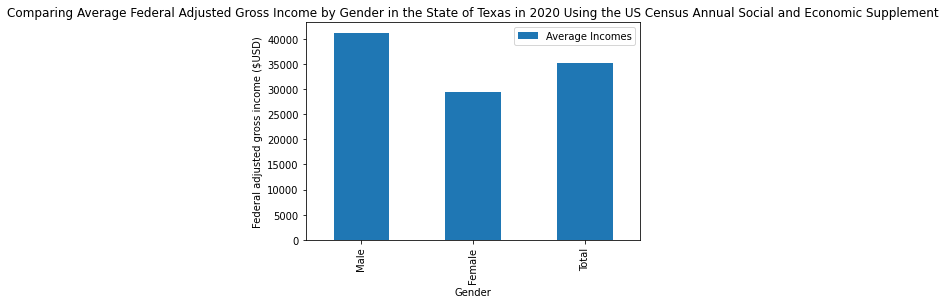

In [45]:
from matplotlib import pyplot as plt
avgs_df.set_index('Gender',drop=True,inplace=True)
avgs_df.plot.bar()
plt.title('Comparing Average Federal Adjusted Gross Income by Gender in the State of Texas in 2020 Using the US Census Annual Social and Economic Supplement')
plt.ylabel('Federal adjusted gross income ($USD)')
plt.xlabel('Gender')

In [54]:
plt.savefig('avg_agi_comparison_bar.png')

<Figure size 432x288 with 0 Axes>